In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/chicky_512.png")

In [3]:
img.shape

(512, 512, 3)

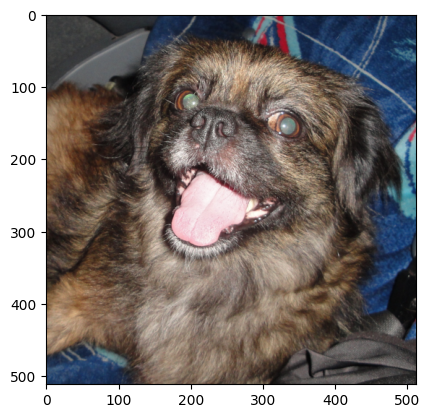

In [6]:
plt.imshow(img[:, :, ::-1])
plt.show()

## Conversión de espacios de color

In [ ]:
PI = 3.14151926
print(PI)
PI = True # Esto no se hace por buenas praxis
print(PI)

3.14151926
True


In [10]:
# Origen2Destino

cv.COLOR_BGRA2GRAY

10

In [12]:
# rgb2gray

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [13]:
img_gray.shape

(512, 512)

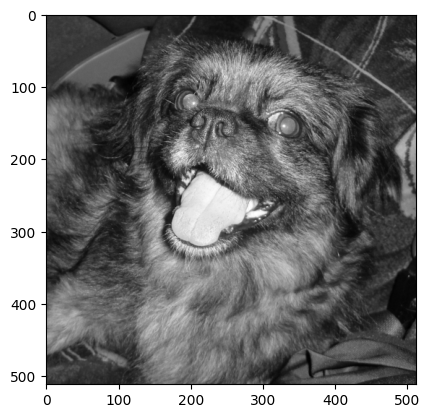

In [15]:
plt.imshow(img_gray, cmap="gray")
plt.show()

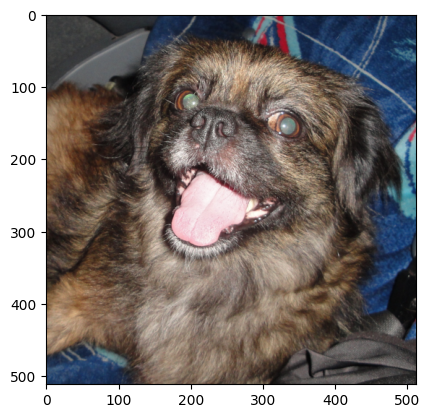

In [16]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [17]:
# YCbCr
img_ycrcb = cv.cvtColor(img_rgb, cv.COLOR_RGB2YCrCb)

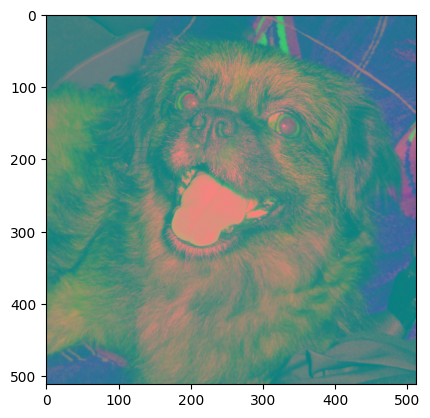

In [18]:
plt.imshow(img_ycrcb)
plt.show()

In [19]:
y, cr, cb = cv.split(img_ycrcb)

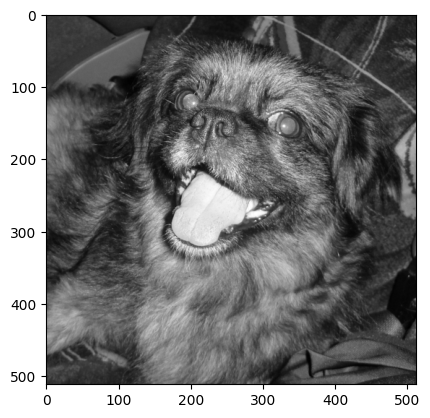

In [ ]:
# Y guarda la información del contraste (brillo) en la imagen

plt.imshow(y, cmap="gray")
plt.show()

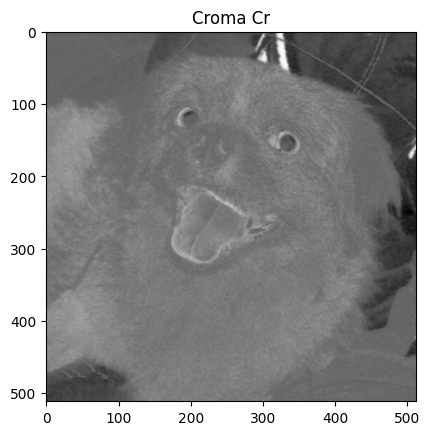

In [21]:
plt.imshow(cr, cmap="gray")
plt.title("Croma Cr")
plt.show()

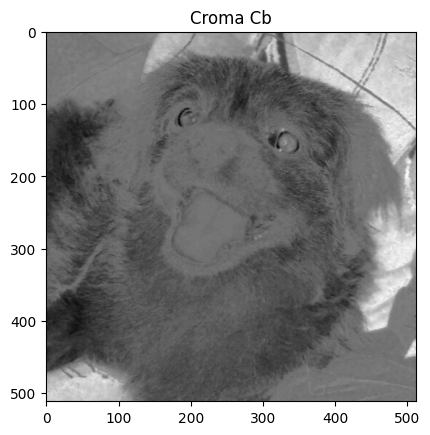

In [22]:
plt.imshow(cb, cmap="gray")
plt.title("Croma Cb")
plt.show()

## Ecualizar histograma de YCrCb

1) Convertir de BGR a YCrCb
2) Separar canales
3) Ecualizar el canal Y
4) Unir (merge) canales, obvio con Y ecualizado
5) Regresar de YCrCb al espacio original
6) (opcional) visualizar el resultado

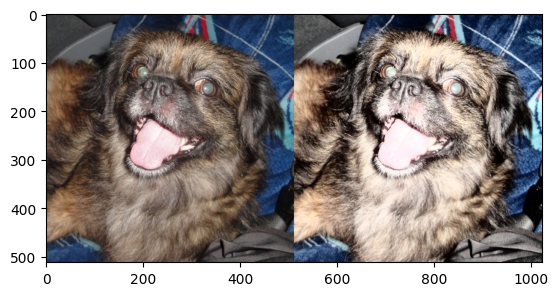

In [24]:
# 3
y_eq = cv.equalizeHist(y)
# 4
img_ycrcb_yeq = cv.merge((y_eq, cr, cb))
# 5
img_rgb_eq = cv.cvtColor(img_ycrcb_yeq, cv.COLOR_YCrCb2RGB)
# 6
plt.imshow(np.hstack((img_rgb, img_rgb_eq)))
plt.show()


In [32]:
def mejorarContrasteYCrCb(img, show=False):
    """
    1) Convertir de BGR a YCrCb
    2) Separar canales
    3) Ecualizar el canal Y
    4) Unir (merge) canales, obvio con Y ecualizado
    5) Regresar de YCrCb al espacio original
    6) (opcional) visualizar el resultado
    """
    ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
    y, cr, cb = cv.split(ycrcb)
    y_eq = cv.equalizeHist(y)
    y_eqcrcb = cv.merge((y_eq, cr, cb))
    img_eq = cv.cvtColor(y_eqcrcb, cv.COLOR_YCrCb2BGR)
    if show:
        img_eq_rgb = cv.cvtColor(img_eq, cv.COLOR_BGR2RGB)
        plt.imshow(img_eq_rgb)
        plt.show()
    return img_eq

In [33]:
lena = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/lena.jpg")
lena_eq = mejorarContrasteYCrCb(lena)

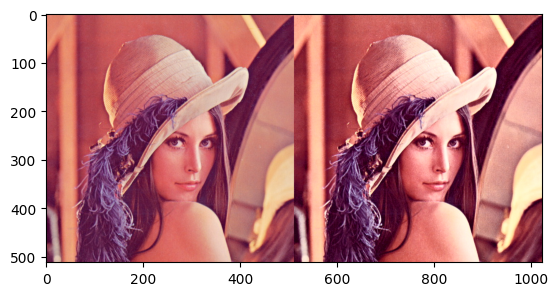

In [34]:
plt.imshow(np.hstack((lena[:, :, ::-1], lena_eq[:, :, ::-1])))

## HSV 
(Hue, Saturation, Value)<br>
HSB<br>
(Hue, Saturation, Brightness)

In [35]:
def mejorarContrasteHSV(img, show=False):
    """
    1) Convertir de BGR a HSV
    2) Separar canales
    3) Ecualizar el canal V
    4) Unir (merge) canales, obvio con V ecualizado
    5) Regresar de HSV al espacio original
    6) (opcional) visualizar el resultado
    """
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v_eq = cv.equalizeHist(v)
    hsv_eq = cv.merge((h, s, v_eq))
    img_eq = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)
    if show:
        img_eq_rgb = cv.cvtColor(img_eq, cv.COLOR_BGR2RGB)
        plt.imshow(img_eq_rgb)
        plt.show()
    return img_eq

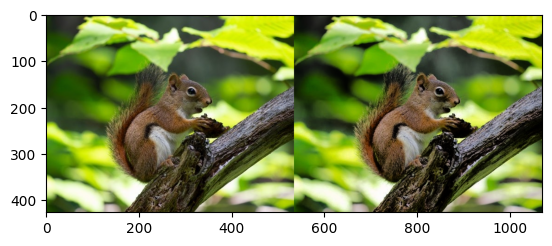

In [37]:
ardilla = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/squirrel_cls.jpg")
ardilla_eq = mejorarContrasteHSV(ardilla)
plt.imshow(np.hstack((ardilla[:, :, ::-1], ardilla_eq[:, :, ::-1])))
plt.show()